probability theory allows us to make uncertain statements and reason
in the presence of uncertainty, information theory allows us to
quantify the amount of uncertainty in a probability distribution

# 3.1 Why Probability?

Machine learning needs to deal with uncertainty & stochasticity.

Frequentist probabilty related directly to the rates at which events
occur. Bayesian probability related to qualitative levels of
certainty.

# 3.2 Random Variables

In [2]:
using Pkg
Pkg.add("Distributions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % [=========>                               ]  21.1 %]  42.1 %==========================>              ]  63.2 %]  84.1 % Resolving package versions...
 Installed PDMats ─ v0.9.6
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [90014a1f] ↑ PDMats v0.9.5 ⇒ v0.9.6


In [1]:
# https://juliastats.github.io/Distributions.jl/latest/starting.html
using Random, Distributions
Random.seed!(666)

MersenneTwister(UInt32[0x0000029a], Random.DSFMT.DSFMT_state(Int32[-1829720698, 1073617959, -209863392, 1073342874, 851925708, 1073663428, 929754575, 1073410908, -1469009651, 1073283821  …  -1656730289, 1072845189, 1382744295, 1073272649, -1940720456, -2031062331, 1988518479, 1214015520, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000

In [2]:
d = Normal()
x = rand(d, 10)

10-element Array{Float64,1}:
  0.0076177742633394985
  0.05702524809146323  
 -0.5484010117038763   
  0.3515255484089337   
 -0.784929798992992    
  0.24501763591278475  
  0.30611493207760276  
 -1.0304943902767967   
 -0.21629784327601548  
 -2.132446790112065    

In [3]:
rand(Cauchy(1), 10)

10-element Array{Float64,1}:
 -0.4237134662306563 
  1.9982078834292953 
 -6.925610565091822  
 -0.42168711834161665
  0.9555525938474783 
  1.7599938921654399 
  1.7950911590950587 
  2.49918091211192   
 -1.6661992395358336 
 -0.7560595129104921 

In [4]:
# generate a discrete distribution

rand(Binomial(100, 0.25), 10)

10-element Array{Int64,1}:
 18
 25
 22
 18
 27
 21
 27
 29
 21
 24

# 3.3 Probability Distributions

## 3.3.1 Discrete Variables and Probability Mass Functions

A probability distribution over discrete variables may be described
using a probability mass function (PMF)

In [5]:
pdf(Bernoulli(0.2), 0)

0.8

## 3.3.2 Continuous Variables and Probability Density Functions
$\int p(x) \mathrm(d)x = 1

In [7]:
# consider a single discrete random variable x with k different
# states. We can place a uniform distribution on x—that is, make each
# of its states equally likely—by setting its probability mass
# function to Px = 1/k
pdf(Uniform(0, 2), .3)

0.5

In [7]:
# https://en.wikipedia.org/wiki/Von_Mises_distribution
pdf(VonMises(0, .2), 3)

0.1292701761195721

# 3.4 Marginal Probability

Marginal probability is probility distribution over a subset of variables. 

In [21]:
# Trying to make an example showing the sum rule

# 3.5 Conditional Probability

It is the probability of some event given some other event has happened. 

In [35]:
using Pkg
Pkg.add("SpecialFunctions")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>]  97.6 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [276daf66] + SpecialFunctions v0.7.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [37]:
using SpecialFunctions

# example from p66:
# https://people.smp.uq.edu.au/YoniNazarathy/julia-stats/exploring-julia-a-statistical-primer-DRAFT.pdf
n = 2000

# Let A be the event of a manufacturing failure, assume to dependent
# on number of dust particals
probAGivenB(k) = 1 - 1 / (k+1)

# This is dust partitcal probility distribution
probB(k) = 6 / (pi * (k + 1)) ^ 2 # 

# now approximate the series until n = 2000
numerical = sum([ probAGivenB(k) * probB(k) for k in 0:n])

analytical = (pi^2 - 6 * zeta(3)) / pi ^ 2

# compare the similared & analytical solution to approximate the
# probabilty of manufactruing failure
numerical, analytical 

(0.26893337073278945, 0.2692370305985609)

# 3.6 The Chain Rule of Conditional Probabilities
# 3.7 Independence and Conditonal Independence

Two random variables x and y are independent if their probability
distribution can be expressed as a product of two factors.

An example showing when events are not independent: Consider drawing a
number uniformly from the range 10 to 25. The probability of drawing
13 could be expressed by drawing 1 and 3 seperately. But the drawing 1
and 3 are not independent in this case:

In [ ]:
numbers = 10:25
N = 10^8

In [8]:
first_digit(x) = Int(floor(x/10))
second_digit(x) = x % 10

thirteen, first_num_one, second_num_three = 0, 0, 0

for _ in 1:N
  X = rand(numbers)
  thirteen += X == 13 ? 1 : 0
  first_num_one += first_digit(X) == 1 ? 1 : 0
  second_num_three += second_digit(X) == 3 ? 1 : 0
end

prob_13, prob_1, prob_3 = (thirteen, first_num_one, second_num_three) ./ N

println("P(13) = ", prob_13, "\n",
        "P(1_) = ", prob_1, "\n",
        "P(_3) = ", prob_3, "\n",
        "P(1_) * P(_3) = ", prob_1 * prob_3)

P(13) = 0.0499990243
P(1_) = 0.5000005103
P(_3) = 0.0999987842
P(1_) * P(_3) = 0.04999944312937958


# 3.8 Expectation, Variance and Covariance

Notion of moments: expectation / mean is the first moment and the zero's moment is always 1. 

The second moment is variance. It gives a measure of how much the values of a function of a random variable x vary as we sample different values of x from it's probability distribution. 

The square root of variance is standard deviation. 

In [7]:
dist = Poisson(5)
N = 10^6
data = rand(dist, N)
mean(data), var(data)

(5.003686, 4.989939403343398)

In [19]:
# var(f) = E(f - E(f)^2) = E(f^2) - (E(f))^2
mean(data.^2) - mean(data)^2

4.989934413403997

Covariance gives some sense of how much two values are linearly related to each other, as well as the scale of these variables. 

In [21]:
cov(data, data.*2)

9.979878806662654

In [38]:
# cov = E(f - E(f))(g - E(g))
mean((data .- mean(data)).*(data*2 .- mean(data.*2)))

9.97986882680799

The notions of covariance and dependence are related, but are in fact distinct concepts. 

They are related because two variables that are independent have zero covariance, and two variables that have non-zero covariance are dependent. 

However, independence is a distinct property from covariance. 

For two variables to have zero covariance, there must be no linear dependence between them. Independence is a stronger requirement than zero covariance, because independence also excludes nonlinear relationships. It is possible for two variables to be dependent but have zero covariance.

# 3.9 Common Probability Distributions
## 3.9.1 Bernoulli Distribution

It is distribution over a single binary random variable. 

In [50]:
dist = Bernoulli(0.7)
data = rand(dist, 10^6)
pdf(dist, 1) == 0.7

true

In [51]:
pdf(dist, 0) == 1 - 0.7

true

In [53]:
pdf(dist, 0.2), 0.7^0.2(1-0.7)^(1-0.2)

(0.0, 0.9731403252061126)

In [54]:
mean(data)

0.700072

## 3.9.2 Multinoulli Distribution

The multinoulli or categorical distribution is a distribution over a single discrete variable with k different states, where k is finite. It is parametrized by vector p, where p gives the probability of the i-th state. 

In [ ]:
dist = Multinomial(1, 0.7)

## 3.9.3 Gaussian Distribution

The most commonly used distribution over real numbers is the normal distribution, also known as the Gaussian distribution. 

In the absence of prior knowledge about what form a distribution over the real numbers should take, the normal distribution is a good default choice for two major reasons. 

First, many distributions we wish to model are truly close to being normal distributions. 

The central limit theorem shows that the sum of many independent random variables is approximately normally distributed. This means that in practice, many complicated systems can be modeled successfully as normally distributed noise, even if the system can be decomposed into parts with more structured behavior.

Second, out of all possible probability distributions with the same variance, the normal distribution encodes the maximum amount of uncertainty over the real numbers. We can thus think  of the normal distribution as being the one that inserts the least amount of prior knowledge into a model.

In [55]:
dist = Normal(20, 3.5)
mean(rand(dist, 10^6)), std(rand(dist, 10^6))

(19.998660382165614, 3.497463393696258)

Precision matrix: a more efficient way compare to using covariance matrix to parametrize the distribution. An even simpler version is the isotropic Gaussian distribution, whose covariance matrix is a scalar times the identity matrix.

In [56]:
dist = MvNormal(20, 3.5)

ZeroMeanIsoNormal(
dim: 20
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [12.25 0.0 … 0.0 0.0; 0.0 12.25 … 0.0 0.0; … ; 0.0 0.0 … 12.25 0.0; 0.0 0.0 … 0.0 12.25]
)


In [59]:
# Construct a multivariate normal distribution of dimension d, with zero mean, 
# and an isotropic covariance
using LinearAlgebra
abs2(3.5) * Matrix(I, 20, 20)

20×20 Array{Float64,2}:
 12.25   0.0    0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0 
  0.0   12.25   0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0   12.25   0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0   12.25   0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0   12.25      0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0   …   0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0    0.0       0.0    0.0    0.0    0.0    0.0 
  0.0    0.0    0.0    0.0 

## 3.9.4 Exponential and Laplace Distributions

Exponential distribution has a sharp point at x = 0.It is often used to model random durations between occurances. 

A closely related probability distribution that allows us to place a sharp peak of probability mass at an arbitrary point μ is the Laplace distribution

## 3.9.5 The Dirac Distribution and Empirical Distribution

A common use of the Dirac delta distribution is as a component of an empirical distribution

## 3.9.6 Mixtures of Distributions

One common way of combining distributions.

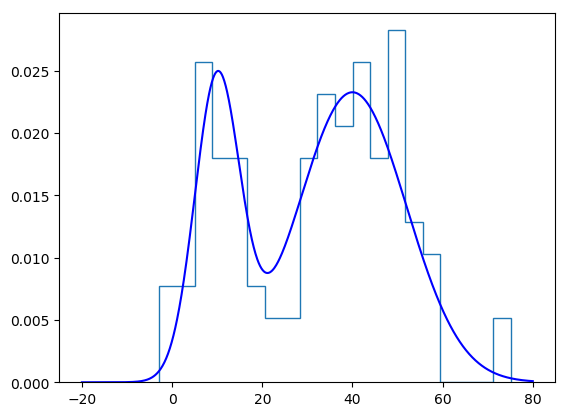

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60f2610908>

In [73]:
using PyPlot
mu1, sigma1 = 10, 5
mu2, sigma2 = 40, 12

z1 = Normal(mu1,sigma1)
z2 = Normal(mu2,sigma2)

p = 0.3

function mixRv()
    (rand() <= p) ? rand(z1) : rand(z2)
end

# p(c|x)
function actualPDF(x)
    p*pdf(z1,x) + (1-p)*pdf(z2,x)
end

numSamples = 100
data = [mixRv() for _ in 1:numSamples]

pdfActual = actualPDF.(-20:0.1:80)

plt[:hist](data,20, histtype = "step", normed=true)
plot(-20:0.1:80, pdfActual,"-b")

# 3.10 Useful Properties of Common Functions

Logistic sigmoid $\sigma(x) = \frac{1}{1+\exp(-x)}$ is commonly used to produce the φ parameter of a Bernoulli distribution because it's range is (0,1). 

The sigmoid function saturates when its argument is very positive or very negative, meaning that the function becomes very flat and insensitive to small changes in its input.

softplus $\zeta(x) = \log(1+\exp(x))$ can be useful for producing the $\beta$ or $\sigma$ parameter of a normal distribution

# 3.11 Bayes’ Rule

$P(x|y)=\frac{P(x)P(y|x)}{p(y)}$

Monty Hall problem
https://rosettacode.org/wiki/Monty_Hall_problem

1 - stay with original choice after door is revealed
2 - Switch after door is revealed

Let $A_i$ be the event that the prize is behind door $i$, $B_i$ is door $i$ is revealed by the host. 

$$
P(A_1|B_2) = \frac{P(A_1)P(B_2|A_1)}{P(B_2)}=\frac{\frac{1}{2} \times \frac{1}{3}}{\frac{1}{2}}=\frac{1}{3}
$$
$$
P(A_3|B_2) = \frac{P(A_3)P(B_2|A_3)}{P(B_2)}=\frac{1 \times \frac{1}{3}}{\frac{1}{2}}=\frac{2}{3}
$$



In [7]:
function monty_hall(switch)
    prize = rand(1:3)
    choice = rand(1:3)
    if prize == choice
        reveal = rand(setdiff(1:3, choice))
    else 
        reveal = rand(setdiff(1:3, [prize, choice]))
    end

    if switch
        choice = setdiff(1:3, [reveal, choice])[1]
    end
    return choice == prize
end

N=10^6
print("Switch:", sum([monty_hall(true) for _ in 1:N])/N, "\n",
    "Not Switch:", sum([monty_hall(false) for _ in 1:N])/N)

Switch:0.667257
Not Switch:0.33296

# 3.12 Technical Details of Continuous Variables

One of the key contributions of **measure theory** is to provide a characterization of the set of sets that we can compute the
probability of without encountering paradoxes like $P(x \in S_1) + P(x \in S_2) > 1$ but $S_1 \cap S_2 = 0$.

**Measure Zero**
Measure theory provides a rigorous way of describing that a set of points is negligibly small (a set have *measure zero*: occupies no volume in the space we are measuring).

Eg. within $\mathbb R^2$, a line has measure zero while a filled polygon has positive measure.

Any union of countably many sets that each have measure zero also has measure zero.

**Almost Everywher**

A property that holds almost everywhere holds throughout all of space except for on a set of measure zero. Some important results in probability theory hold for all discrete values but only hold “almost everywhere” for continuous values.

blah about how g introduced distortion of space that the infinitesimal volume surrounding x in x space may have different volumn in y space. (book gave an example about why $\int p_y(y)dy=1/2$ is wrong). 

the derivative generalizes to the determinant of the Jacobian matrix:
$$
p_x(x)=p_y(g(x)) | \det(\frac{\partial g(x)}{\partial x}) |
$$

# 3.13 Information Theory

Information theory tells how to design optimal codes and calculate the expected length of messages sampled from specific probability distributions using various encoding schemes.

Key ideas from information theory to characterize probability distributions or quantify similarity between probability distributions

- Likely events should have low information content, and in the extreme case, events that are guaranteed to happen should have no information content whatsoever.  
- Less likely events should have higher information content.  
- Independent events should have additive information. For example, finding out that a tossed coin has come up as heads twice should convey twice as much information as finding out that a tossed coin has come up as heads once.  

self-information of an event x = x: $I(x) = −\log P(x)$

One nat is the amount of information gained by observing an event of probability $\frac{1}{e}$. If using base-2, the unit will be called bits or shannons.

Shannon entropy ($H(P)$) or differential entropy for contunous distribution, quantify the amount of uncertainty in an entire probability distribution: 

$$
H(x)=\mathbb E_{x~P}[I(x)] = -\mathbb E_{x~P}[\log P(x)]
$$

**Kullback-Leibler divergence** measure how different two distributions are.

$$
D_{KL}(P || Q) = \mathbb E_{x~P}[\log P(x)-\log Q(x)]
$$

KL divergence: Non-negative: 0 -> almost everywhere; not a true distance measure because it is not symmetric $D_{KL}(P || Q) \neq D_{KL}(Q || P)$ for some $P$ and $Q$.

**Cross entropy**: $H(P,Q)=-\mathbb E_{x~P}\log Q(x)$. Minimizing the cross-entropy with respect to Q is equivalent to minimizing the KL divergence.

# 3.14 Structured Probabilistic Models

When we represent the factorization of a probability distribution with a graph (a set of vertices that may be connected to each other with edges), we call it a structured probabilistic model or graphical model

Directed models use graphs with directed edges, and they represent factorizations into conditional probability distributions.

Undirected models use graphs with undirected edges, and they represent
factorizations into a set of functions

In [ ]:
Pkg.add("LightGraphs")
Pkg.add("GraphPlot")

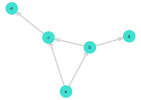

In [11]:
using LightGraphs
using GraphPlot

# Figure 3.7
G₁ = DiGraph(5) 

# make a triangle
add_edge!(G₁, 1, 2)
add_edge!(G₁, 1, 3)
add_edge!(G₁, 2, 3)
add_edge!(G₁, 2, 4)
add_edge!(G₁, 3, 5)

gplot(G₁, nodelabel=["a", "b", "c", "d", "e"])

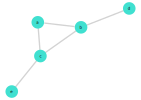

In [21]:
G = Graph(5) 

# make a triangle
add_edge!(G, 1, 2)
add_edge!(G, 1, 3)
add_edge!(G, 2, 3)
add_edge!(G, 2, 4)
add_edge!(G, 3, 5)

gplot(G, nodelabel=["a", "b", "c", "d", "e"])

# A = [0 0 1 0 1
#     0 1 0 1 0
#     0 1 1 0 0
#     1 0 1 0 0
#     1 1 0 0 0]